In [1]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
import numpy as np
pd.plotting.register_matplotlib_converters()
import seaborn as sns

In [2]:
fb= pd.read_csv("C:/Users/asibh/OneDrive/Desktop/Project -Applied ML/FB.csv")
google= pd.read_csv("C:/Users/asibh/OneDrive/Desktop/Project -Applied ML/GOOGL.csv")
amazon= pd.read_csv("C:/Users/asibh/OneDrive/Desktop/Project -Applied ML/AMZN.csv")
netflix= pd.read_csv("C:/Users/asibh/OneDrive/Desktop/Project -Applied ML/NFLX.csv") 

In [3]:
def setindexs(x):
    x['Date']= pd.to_datetime(x['Date'])
    x=x.set_index('Date',inplace=True)


In [4]:
setindexs(google)
setindexs(fb)
setindexs(netflix)
setindexs(amazon)

In [5]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1828 entries, 2012-05-18 to 2019-08-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1828 non-null   float64
 1   High       1828 non-null   float64
 2   Low        1828 non-null   float64
 3   Close      1828 non-null   float64
 4   Adj Close  1828 non-null   float64
 5   Volume     1828 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 100.0 KB


In [6]:
fb=fb['Close']
google=google['Close']
amazon=amazon['Close']
netflix=netflix['Close']

In [7]:
fang=pd.concat([fb,amazon,netflix,google],axis=1,join='inner')


In [8]:
fang.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1828 entries, 2012-05-18 to 2019-08-23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1828 non-null   float64
 1   Close   1828 non-null   float64
 2   Close   1828 non-null   float64
 3   Close   1828 non-null   float64
dtypes: float64(4)
memory usage: 71.4 KB


In [9]:
fang.columns.values[0]="fb"
fang.columns.values[1]="amazon"
fang.columns.values[2]="netflix"
fang.columns.values[3]="google"

In [10]:
fang.head()
fang.index = pd.DatetimeIndex(fang.index).to_period('D')

In [11]:

def autocorrelation(i):
    
    plt.rcParams["figure.figsize"] = (20,7)

    acf_plot = plot_acf(i.values, lags = 70)
    plt.xlabel('lag')
    plt.ylabel('correlation for %s' %i )
    plt.show()

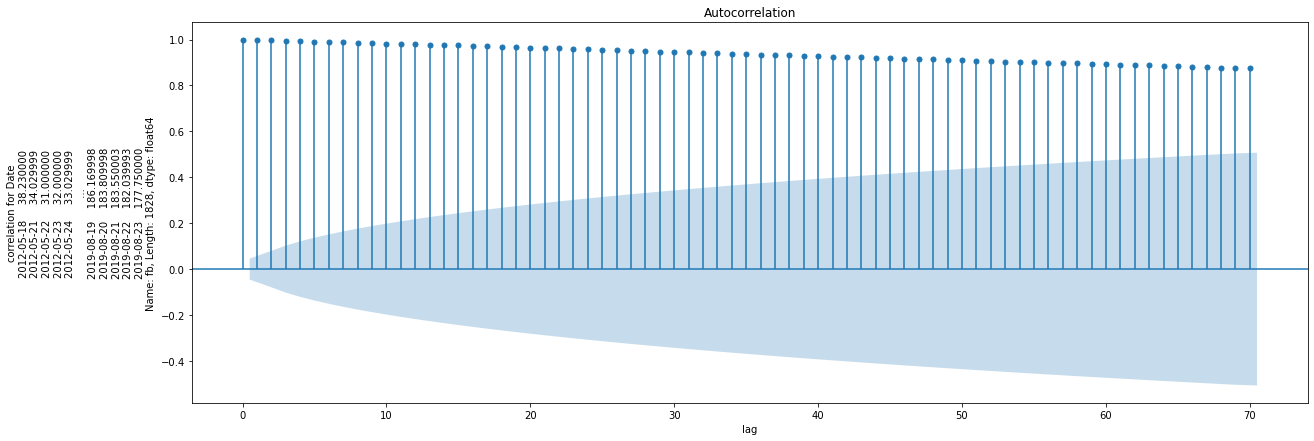

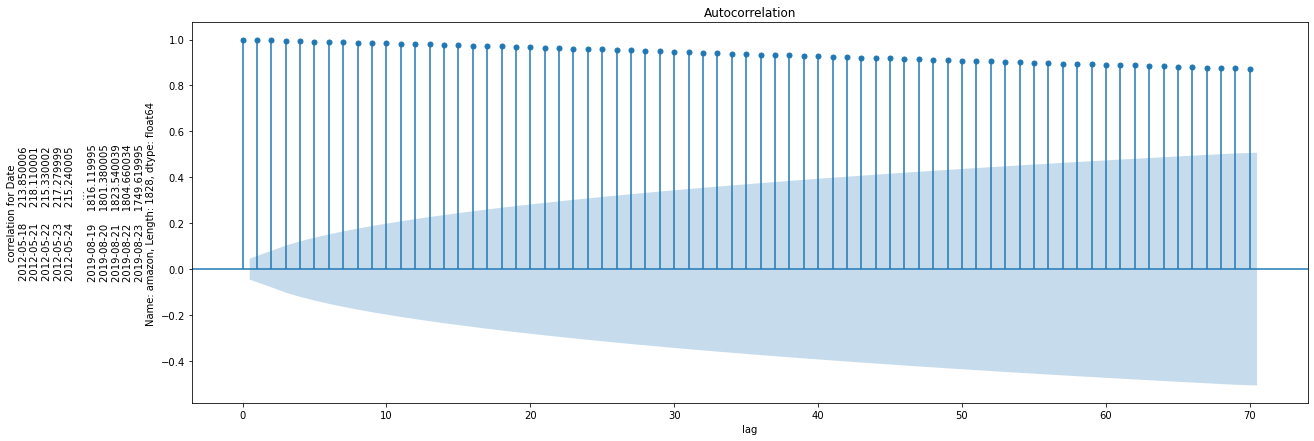

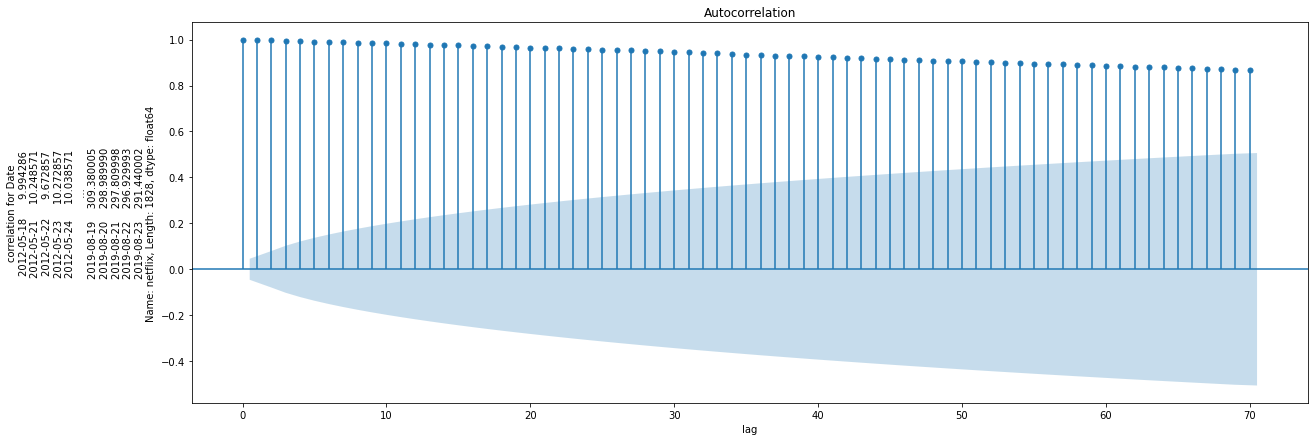

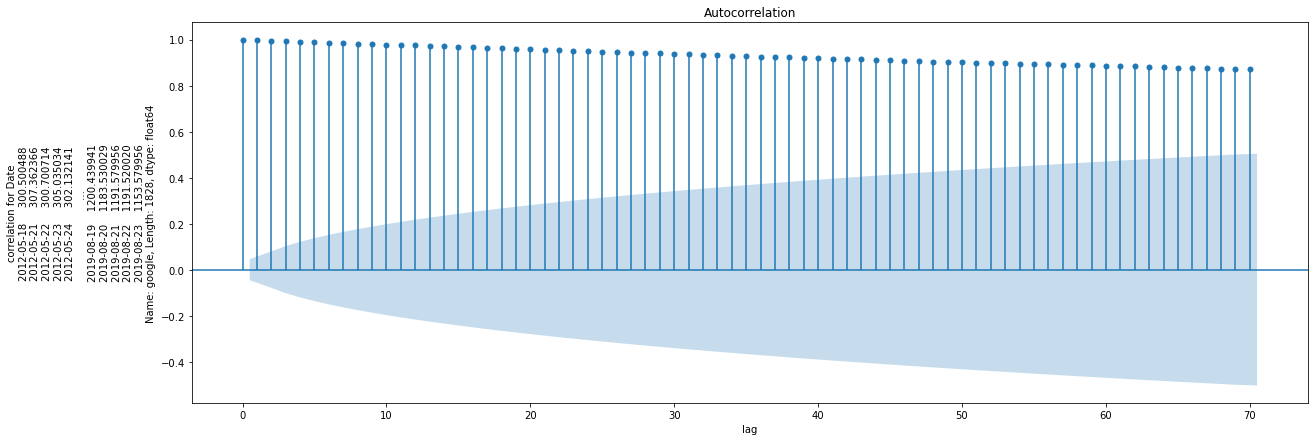

fb         None
amazon     None
netflix    None
google     None
dtype: object

In [12]:
fang.apply(autocorrelation,axis=0)

In [12]:
# All these FANG stocks are not stationary as ACF plots suggest.# checking for PACF
def partcorr(x):
    
    plt.rcParams["figure.figsize"] = (20,7)

    pacf_plot = plot_pacf(x.values, lags = 70)
    plt.xlabel('lag')
    plt.ylabel('pcorrelation %s'%x)
    plt.show()


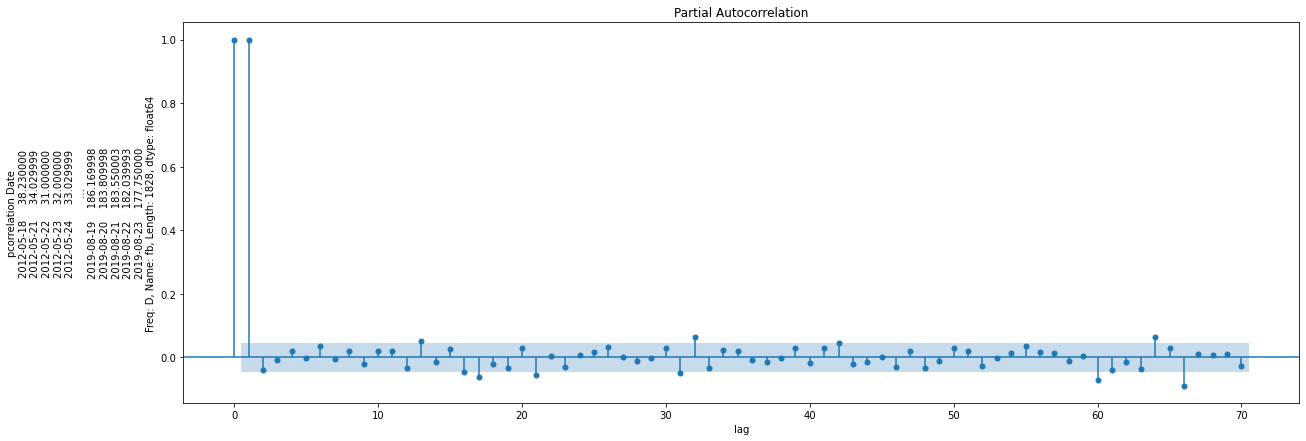

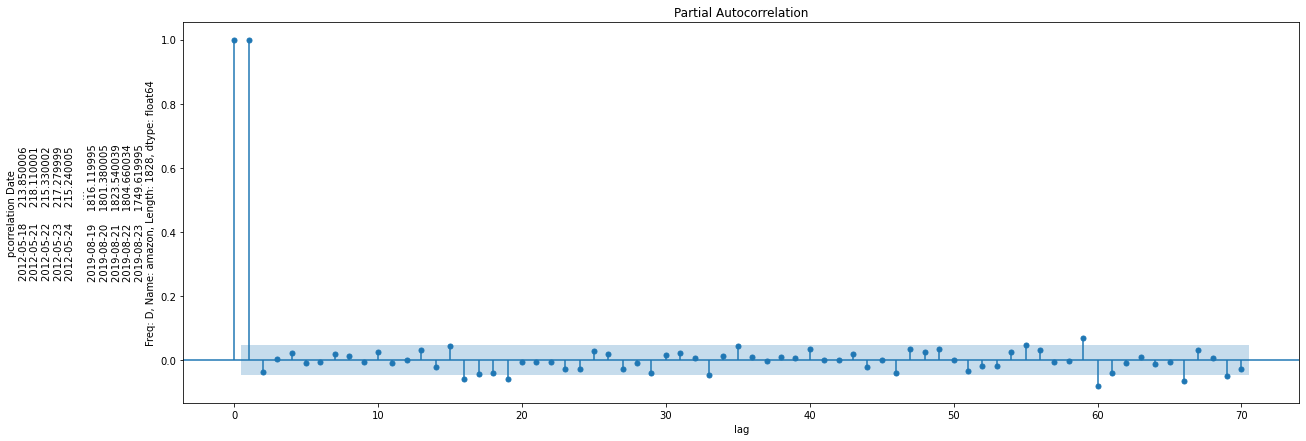

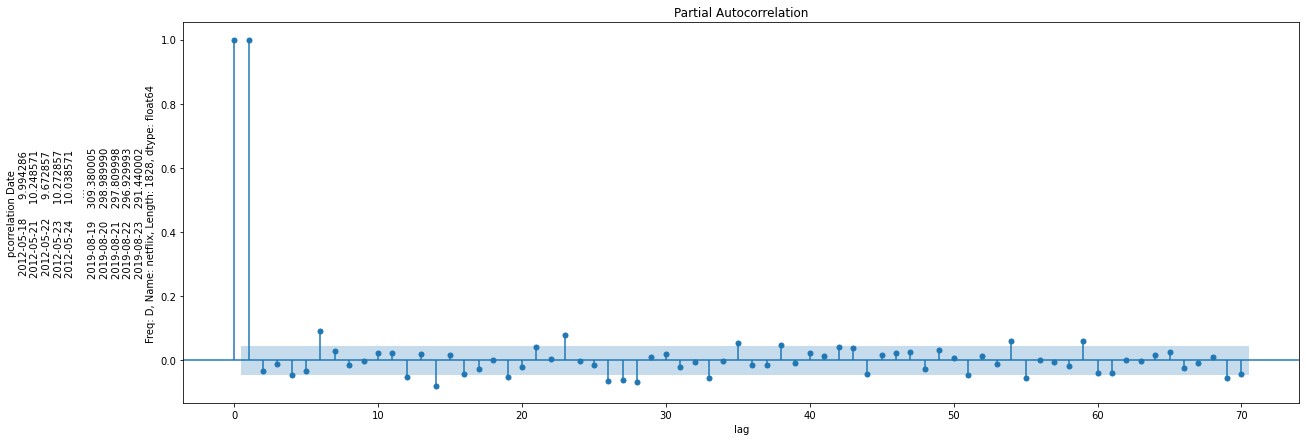

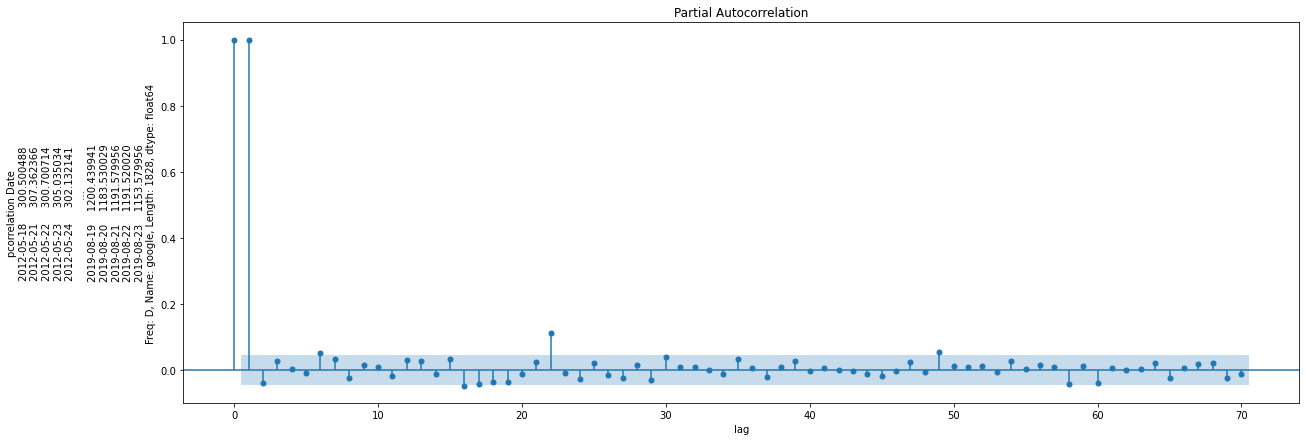

fb         None
amazon     None
netflix    None
google     None
dtype: object

In [13]:
fang.apply(partcorr,axis=0)

TypeError: Axis must have `freq` set to convert to Periods

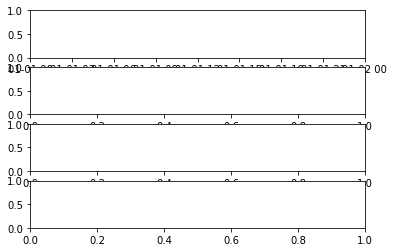

In [12]:
    from statsmodels.tsa.seasonal import seasonal_decompose

    for i in fang:

        analysis = fang[[i]].copy()

        decompose_result_mult = seasonal_decompose(analysis, model="multiplicative",period=12)

        trend = decompose_result_mult.trend
        seasonal = decompose_result_mult.seasonal
        residual = decompose_result_mult.resid

        decompose_result_mult.plot();
        

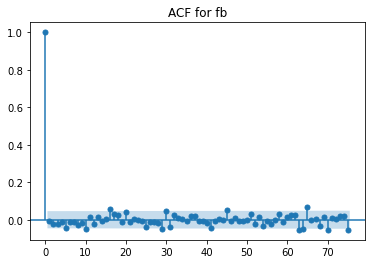

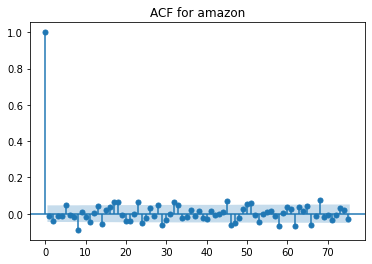

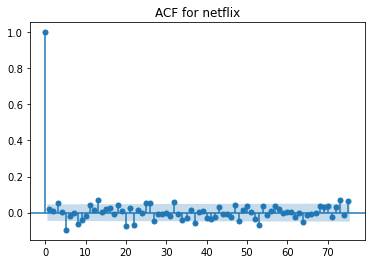

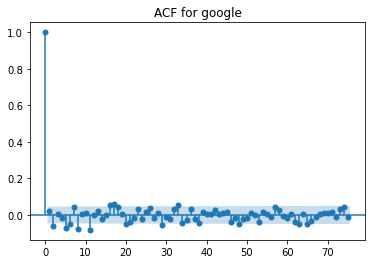

In [13]:
for i in fang:
    plot_acf(fang[i].diff().dropna(), lags = 75)
    pyplot.title('ACF for %s' % i) 
    pyplot.show()

In [14]:
# performs the Augmented Dickey-Fuller Test for all our variables of interest without
# a constant, with a constant, and with a constant and linear trend
from statsmodels.tsa.stattools import adfuller
for i in fang:
    for j in ['nc', 'c', 'ct']:
        result = adfuller(fang[i], regression = j)
        print('ADF Statistic with %s for %s: %f' % (j, i, result[0]))
        print('p-value: %f' % result[1])

ADF Statistic with nc for fb: 0.885508
p-value: 0.899063
ADF Statistic with c for fb: -0.821932
p-value: 0.812595
ADF Statistic with ct for fb: -3.677706
p-value: 0.023868
ADF Statistic with nc for amazon: 1.861187
p-value: 0.985800
ADF Statistic with c for amazon: 0.192294
p-value: 0.971826
ADF Statistic with ct for amazon: -1.981136
p-value: 0.611671
ADF Statistic with nc for netflix: 0.533637
p-value: 0.832489
ADF Statistic with c for netflix: -0.763367
p-value: 0.829647
ADF Statistic with ct for netflix: -2.329916
p-value: 0.417479
ADF Statistic with nc for google: 1.661635
p-value: 0.976855
ADF Statistic with c for google: -0.931349
p-value: 0.777474
ADF Statistic with ct for google: -3.601308
p-value: 0.029736


In [17]:
# performs the Augmented Dickey-Fuller Test for all our variables of interest without
# a constant, with a constant, and with a constant and linear trend
for i in fang:
    for j in ['nc', 'c', 'ct']:
        result = adfuller(fang[i].diff().dropna(), regression = j)
        print('ADF Statistic with %s for %s: %f' % (j, i, result[0]))
        print('p-value: %f' % result[1])

ADF Statistic with nc for fb: -43.012940
p-value: 0.000000
ADF Statistic with c for fb: -43.052724
p-value: 0.000000
ADF Statistic with ct for fb: -43.040649
p-value: 0.000000
ADF Statistic with nc for amazon: -7.537966
p-value: 0.000000
ADF Statistic with c for amazon: -8.509676
p-value: 0.000000
ADF Statistic with ct for amazon: -8.564179
p-value: 0.000000
ADF Statistic with nc for netflix: -7.258766
p-value: 0.000000
ADF Statistic with c for netflix: -7.368498
p-value: 0.000000
ADF Statistic with ct for netflix: -7.363890
p-value: 0.000000
ADF Statistic with nc for google: -9.658616
p-value: 0.000000
ADF Statistic with c for google: -9.858933
p-value: 0.000000
ADF Statistic with ct for google: -9.856492
p-value: 0.000000


In [18]:
for i in fang:
    for j in ['nc', 'c', 'ct']:
        result = adfuller(fang[i].diff().dropna(), regression = j)
        print(result)

(-43.01294045853959, 0.0, 0, 1826, {'1%': -2.56696551276499, '5%': -1.9411481015671397, '10%': -1.6166753552583915}, 8102.892000733102)
(-43.05272379059139, 0.0, 0, 1826, {'1%': -3.433936263195097, '5%': -2.8631241351249, '10%': -2.5676133397235263}, 8102.640074494791)
(-43.040648983446935, 0.0, 0, 1826, {'1%': -3.9637364341132324, '5%': -3.412897098647157, '10%': -3.128467172080625}, 8104.6380209052895)
(-7.53796623587399, 3.701764236100315e-12, 25, 1801, {'1%': -2.5669825396341905, '5%': -1.9411501714494233, '10%': -1.6166733587567375}, 15518.77634124788)
(-8.509675788153393, 1.1767116376591436e-13, 23, 1803, {'1%': -3.4339820768018106, '5%': -2.8631443597478143, '10%': -2.567624108684946}, 15516.364534074815)
(-8.564179448996068, 3.573154131338251e-12, 23, 1803, {'1%': -3.963799899236327, '5%': -3.4129278400471494, '10%': -3.12848526556394}, 15517.336223480897)
(-7.258765781963127, 1.5866461381040835e-11, 25, 1801, {'1%': -2.5669825396341905, '5%': -1.9411501714494233, '10%': -1.616

In [19]:

from pandas.plotting import lag_plot

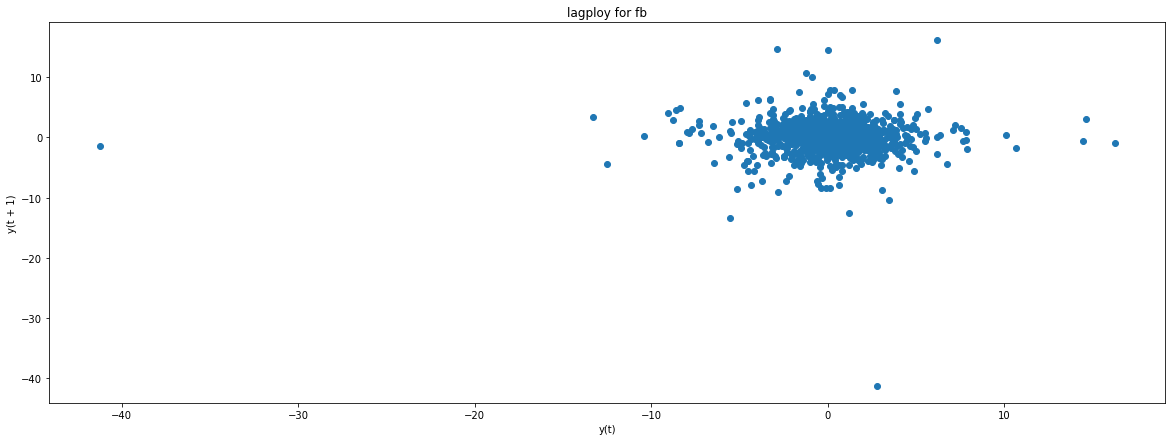

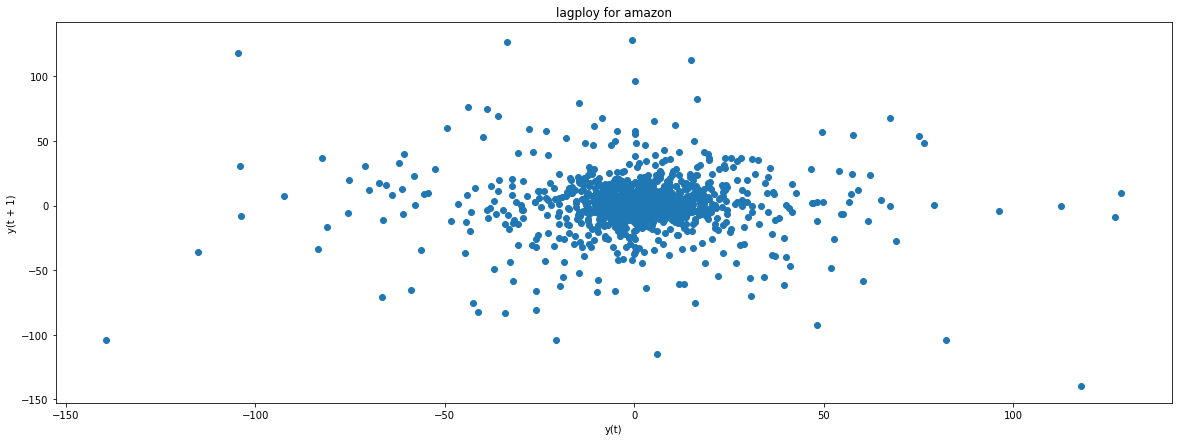

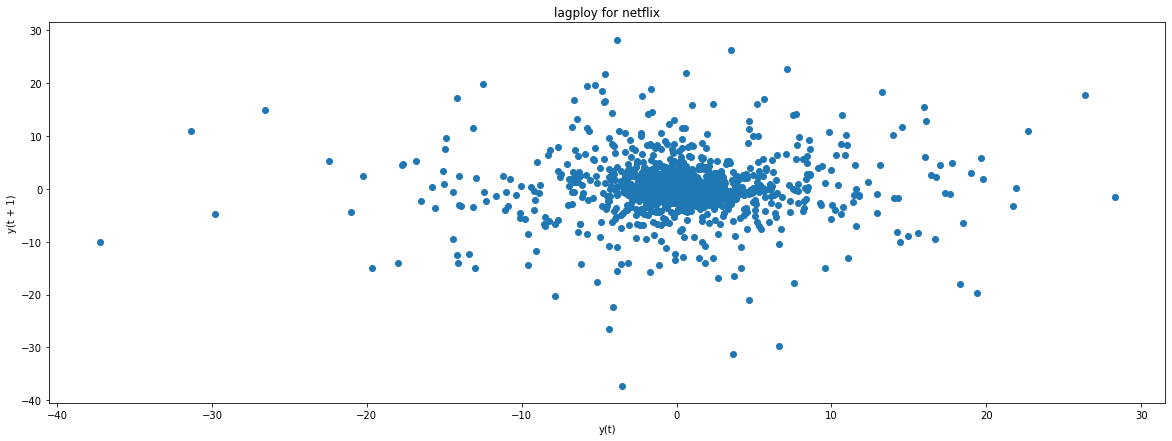

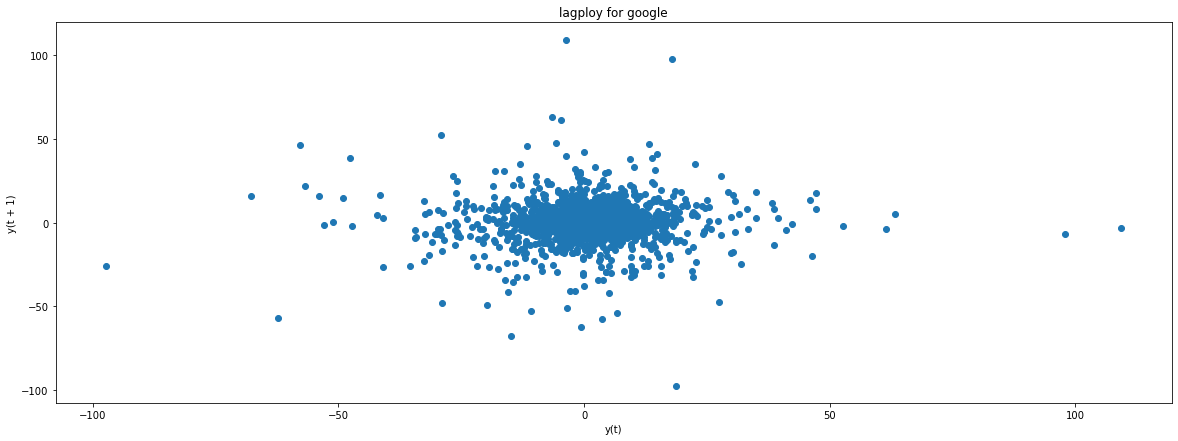

In [20]:

for i in fang:
    lag_plot(fang[i].diff().dropna())
    pyplot.title('lagploy for %s' % i) 
    pyplot.show()

C:\Users\asibh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\asibh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\asibh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


TypeError: Axis must have `freq` set to convert to Periods

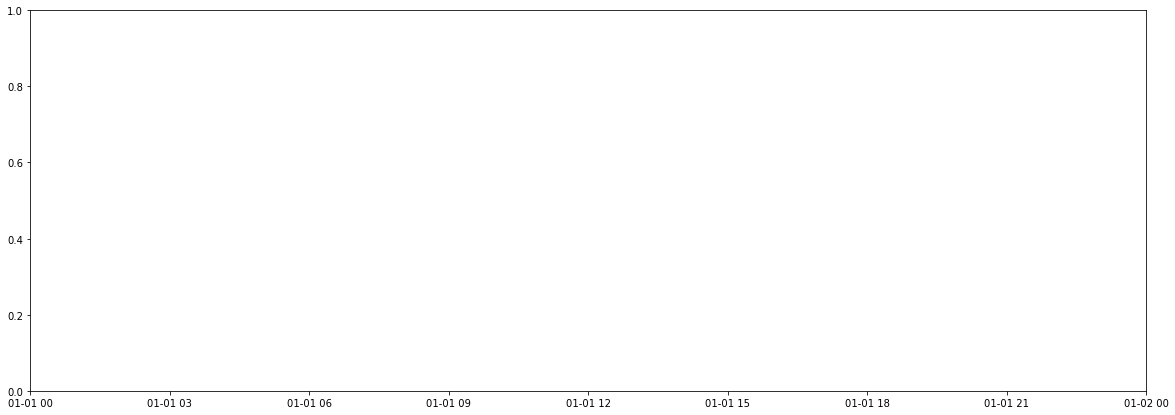

In [15]:
from tqdm.notebook import tqdm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# predict last 50 Return values one by one
# also called rolling forecasting origin

df_arma = fang.copy()
df_arma['fb_diff'] = df_arma['fb'].diff()
df_arma = df_arma.dropna()

df_pred = pd.DataFrame()

for i in tqdm(range(50)):
    
    training_data = df_arma['fb'][:(-100+i)]
    
    #order = (p, d, q) where MA(q)
    model = ARIMA(training_data, order = (3, 0, 3))
    model_fit = model.fit()
    pred_temp = model_fit.get_forecast(1).summary_frame()
    df_pred = df_pred.append(pred_temp)

df_pred = pd.merge(df_pred, df_arma, how = 'left', left_index = True, right_index = True)
df_pred['fb_pred'] = df_pred['mean'] + df_arma['fb'].shift()
df_pred['fb'] = df_pred['fb_diff'] + df_arma['fb'].shift()
df_pred['ci_lower'] = df_pred['mean_ci_lower'] + df_arma['fb'].shift()
df_pred['ci_upper'] = df_pred['mean_ci_upper'] + df_arma['fb'].shift()

plt.rcParams["figure.figsize"] = (20,7)
plt.plot(df_pred['fb'], color = 'green')
plt.plot(df_pred['fb_pred'], color = 'red')
plt.legend(['fb', 'price'])
plt.fill_between(df_pred.index,
                 df_pred['ci_lower'],
                 df_pred['ci_upper'], color='lightblue', alpha=0.5)
plt.title('ARMA(3,3), MSE: {:,}'.format(round(
                mean_squared_error(df_pred['fb'], df_pred['fb_pred']),2)))
plt.grid()
plt.show()
del df_arma, df_pred

In [19]:
from statsmodels.tsa.arima.model import ARIMA
def arima_mod(i):
    fang_ar = fang.copy()
    fang_ar[i] = fang_ar[i].diff()
    fang_ar = fang_ar.dropna()

    training_data = fang_ar[i][:-50]

    # order = (p, d, q) where AR(p)
    model = ARIMA(training_data, order = (3, 0, 2))
    model_fit = model.fit()
    return model_fit.summary()

In [20]:
arima_mod('fb')

C:\Users\asibh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\asibh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     fb   No. Observations:                 1777
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -3961.917
Date:                Wed, 08 Dec 2021   AIC                           7937.834
Time:                        10:57:37   BIC                           7976.212
Sample:                    05-21-2012   HQIC                          7952.010
                         - 06-13-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.045      1.749      0.080      -0.010       0.168
ar.L1          0.2118      1.146      0.185      0.853      -2.034       2.458
ar.L2          0.4972      0.983      0.506      0.613      -1.430       2.424
ar.L3         -0.0289      0.034     -0.843      0.399      -0.096       0.038
ma.L1         -0.2246      1.145     -0.196      0.844      -2.469       2.020
ma.L2         -0.5317      1.003     -0.530      0.596      -2.498       1.435
sigma2         5.0592      0.040    125.343      0.000       4.980       5.138
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            338353.16
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               7.83   Skew:                            -3.28
Prob(H) (two-sided):                  0.00   Kurtosis:                        70.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
arima_mod('amazon')

C:\Users\asibh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\asibh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\asibh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 amazon   No. Observations:                 1777
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -7623.990
Date:                Wed, 08 Dec 2021   AIC                          15261.980
Time:                        01:09:22   BIC                          15300.359
Sample:                    05-21-2012   HQIC                         15276.156
                         - 06-13-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9652      0.418      2.307      0.021       0.145       1.785
ar.L1          0.7794      0.013     57.891      0.000       0.753       0.806
ar.L2         -0.9635      0.012    -77.181      0.000      -0.988      -0.939
ar.L3         -0.0314      0.010     -3.120      0.002      -0.051      -0.012
ma.L1         -0.8008      0.012    -68.921      0.000      -0.824      -0.778
ma.L2          0.9778      0.011     92.066      0.000       0.957       0.999
sigma2       314.4021      4.006     78.474      0.000     306.550     322.255
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             14085.87
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              24.34   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
arima_mod('netflix')

C:\Users\asibh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\asibh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                netflix   No. Observations:                 1777
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -5152.686
Date:                Wed, 08 Dec 2021   AIC                          10319.373
Time:                        01:09:25   BIC                          10357.752
Sample:                    05-21-2012   HQIC                         10333.549
                         - 06-13-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1875      0.108      1.729      0.084      -0.025       0.400
ar.L1         -0.2555      0.023    -11.129      0.000      -0.300      -0.211
ar.L2         -0.9186      0.017    -52.658      0.000      -0.953      -0.884
ar.L3          0.0481      0.013      3.698      0.000       0.023       0.074
ma.L1          0.2641      0.020     13.487      0.000       0.226       0.302
ma.L2          0.9173      0.018     51.345      0.000       0.882       0.952
sigma2        19.3233      0.272     70.993      0.000      18.790      19.857
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7278.31
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              42.73   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
arima_mod('google')

C:\Users\asibh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\asibh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 google   No. Observations:                 1777
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -6864.949
Date:                Wed, 08 Dec 2021   AIC                          13743.897
Time:                        01:09:27   BIC                          13782.276
Sample:                    05-21-2012   HQIC                         13758.073
                         - 06-13-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4489      0.213      2.112      0.035       0.032       0.866
ar.L1          0.0880      0.187      0.470      0.638      -0.279       0.455
ar.L2          0.6597      0.166      3.966      0.000       0.334       0.986
ar.L3         -0.0318      0.027     -1.156      0.248      -0.086       0.022
ma.L1         -0.0609      0.187     -0.326      0.744      -0.427       0.305
ma.L2         -0.7224      0.154     -4.678      0.000      -1.025      -0.420
sigma2       132.7605      1.831     72.510      0.000     129.172     136.349
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8058.64
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               6.56   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [93]:
#from statsmodels.tsa.stattools import acf
train = fang.iloc[:len(fang)-50]
test = fang.iloc[len(fang)-50:]

# Build Model 
model = ARIMA(train['fb'], order=(3, 1, 2))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(50, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)
forecast=pd.DataFrame(fc_series)


mape = np.mean(np.abs((test['fb'] - forecast)/test['fb']))*100

#Plot
#pd.plotting.register_matplotlib_converters()
#plt.figure(figsize=(12,5), dpi=100)
#plt.plot(train['fb'], label='training')
#plt.plot(test['fb'], label='actual')

  
print(forecast)
#plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
 #                color='k', alpha=.15)
#plt.title('Forecast vs Actuals')
#plt.legend(loc='upper left', fontsize=8)
#plt.show()

C:\Users\asibh\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                     0
Date                  
2019-06-14  177.522251
2019-06-17  177.582623
2019-06-18  177.576609
2019-06-19  177.629025
2019-06-20  177.660909
2019-06-21  177.719207
2019-06-24  177.771331
2019-06-25  177.835788
2019-06-26  177.899075
2019-06-27  177.968391
2019-06-28  178.038066
2019-07-01  178.110833
2019-07-02  178.184268
2019-07-03  178.259365
2019-07-05  178.335060
2019-07-08  178.411687
2019-07-09  178.488761
2019-07-10  178.566375
2019-07-11  178.644299
2019-07-12  178.722543
2019-07-15  178.800995
2019-07-16  178.879640
2019-07-17  178.958420
2019-07-18  179.037319
2019-07-19  179.116304
2019-07-22  179.195363
2019-07-23  179.274477
2019-07-24  179.353636
2019-07-25  179.432831
2019-07-26  179.512054
2019-07-29  179.591299
2019-07-30  179.670563
2019-07-31  179.749840
2019-08-01  179.829128
2019-08-02  179.908425
2019-08-05  179.987729
2019-08-06  180.067038
2019-08-07  180.146352
2019-08-08  180.225669
2019-08-09  180.304989
2019-08-12  180.384312
2019-08-13 

C:\Users\asibh\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\asibh\anaconda3\lib\site-packages\pandas\core\indexes\base.py:3519: RuntimeWarning: '<' not supported between instances of 'Period' and 'int', sort order

In [27]:
#Google and Amazon are only stocks whose present values can be determined by atleast 2 lags ( in other models p-value is not significant)

In [28]:
#Let us check for granger causaility and johansen cointegration ( to know whether these stocks have causual effect)
from itertools import permutations
from statsmodels.tsa.stattools import grangercausalitytests

perm_s=list(permutations(fang,2))

for i in range(len(perm_s)):
    temp_list=list(perm_s[i])
    temp_df=fang[temp_list]
    print('Does a lag of ' + temp_list[1] + ' predict ' + temp_list[0])
    # prints the results of a Granger Causality test for each permutation with 1 lage
    print(grangercausalitytests(temp_df, maxlag = 5, addconst = True, verbose = True))
    # leaves two spaces for readability
    print('')
    print('')


Does a lag of amazon predict fb

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2064  , p=0.6496  , df_denom=1824, df_num=1
ssr based chi2 test:   chi2=0.2068  , p=0.6493  , df=1
likelihood ratio test: chi2=0.2068  , p=0.6493  , df=1
parameter F test:         F=0.2064  , p=0.6496  , df_denom=1824, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.4840  , p=0.0309  , df_denom=1821, df_num=2
ssr based chi2 test:   chi2=6.9871  , p=0.0304  , df=2
likelihood ratio test: chi2=6.9737  , p=0.0306  , df=2
parameter F test:         F=3.4840  , p=0.0309  , df_denom=1821, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.6213  , p=0.0492  , df_denom=1818, df_num=3
ssr based chi2 test:   chi2=7.8941  , p=0.0483  , df=3
likelihood ratio test: chi2=7.8770  , p=0.0486  , df=3
parameter F test:         F=2.6213  , p=0.0492  , df_denom=1818, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based 

In [29]:
#Amazon lags help to predict netflix( for max lag=1 or with 10%significane lag=3)
#fb predict Amazon
#netflix predict amazon(for lesser number of lags)
#fb predict google( for 10% significance level)
#These series are not independent of each other, we cannot use Vector auto correlation in this case , we can use restricted VAR(VECM)


In [30]:
# imports the coint_johansen function to test for cointegration as a prerequisite for VEC 
# modeling
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# uses https://nbviewer.jupyter.org/github/mapsa/seminario-doc-2014/blob/master/cointegration-
# example.ipynb to create functions to return the number of cointegrating vectors based 
# on the Trace version if the Johansen Cointegration Test
def johansen_trace(y, p):
        N, l = y.shape
        joh_trace = coint_johansen(y, 0, p)
        r = 0
        for i in range(l):
            if joh_trace.lr1[i] > joh_trace.cvt[i, 1]:     # 0: 90%  1:95% 2: 99%
                r = i + 1
        joh_trace.r = r

        return joh_trace

# loops through 1 to 10 lags of trading days trading days
for i in range(1, 11): 
    # tests for cointegration at i lags
    joh_trace = johansen_trace(fang.diff().dropna(), i)
    # prints the results
    print('Using the Trace Test, there are', joh_trace.r, '''cointegrating vectors at 
    %s lags between the FANG stocks''' % i)
    # prints a space for readability
    print()

Using the Trace Test, there are 4 cointegrating vectors at 
    1 lags between the FANG stocks

Using the Trace Test, there are 4 cointegrating vectors at 
    2 lags between the FANG stocks

Using the Trace Test, there are 4 cointegrating vectors at 
    3 lags between the FANG stocks

Using the Trace Test, there are 4 cointegrating vectors at 
    4 lags between the FANG stocks

Using the Trace Test, there are 4 cointegrating vectors at 
    5 lags between the FANG stocks

Using the Trace Test, there are 4 cointegrating vectors at 
    6 lags between the FANG stocks

Using the Trace Test, there are 4 cointegrating vectors at 
    7 lags between the FANG stocks

Using the Trace Test, there are 4 cointegrating vectors at 
    8 lags between the FANG stocks

Using the Trace Test, there are 4 cointegrating vectors at 
    9 lags between the FANG stocks

Using the Trace Test, there are 4 cointegrating vectors at 
    10 lags between the FANG stocks



In [31]:

from statsmodels.tsa.vector_ar.vecm import select_coint_rank

vec_rank = select_coint_rank(fang, det_order = 1, k_ar_diff = 1, method = 'trace', signif=0.05)
print(vec_rank.summary())

Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   4          74.90          55.25
  1   4          46.40          35.01
  2   4          22.27          18.40
  3   4          3.595          3.841
-------------------------------------


In [32]:
vec_rank2 = select_coint_rank(fang, det_order = 1, k_ar_diff = 1, method = 'maxeig', signif=0.01)
print(vec_rank2.summary())

Johansen cointegration test using maximum eigenvalue test statistic with 1% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   1          28.49          36.19
-------------------------------------


In [97]:
# imports VECM for VECM modeling
from statsmodels.tsa.vector_ar.vecm import VECM

# estimates the VECM on the closing prices with 4 lags, 1 cointegrating relationship, and
# a constant within the cointegration relationship
fang_vecm = VECM(endog = fang, k_ar_diff = 4, coint_rank = 1, deterministic = 'ci')
fang_vecm_fit = fang_vecm.fit()
fang_vecm_fit.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
L1.fb,0.0183,0.030,0.616,0.538,-0.040,0.076
L1.amazon,-0.0097,0.004,-2.215,0.027,-0.018,-0.001
L1.netflix,-0.0170,0.015,-1.136,0.256,-0.046,0.012
L1.google,0.0092,0.006,1.461,0.144,-0.003,0.021
L2.fb,0.0309,0.030,1.038,0.299,-0.027,0.089
L2.amazon,5.529e-05,0.004,0.013,0.990,-0.009,0.009
L2.netflix,0.0227,0.015,1.514,0.130,-0.007,0.052
L2.google,-0.0227,0.006,-3.622,0.000,-0.035,-0.010
L3.fb,-0.0167,0.030,-0.560,0.576,-0.075,0.042
L3.amazon,-0.0033,0.004,-0.747,0.455,-0.012,0.005


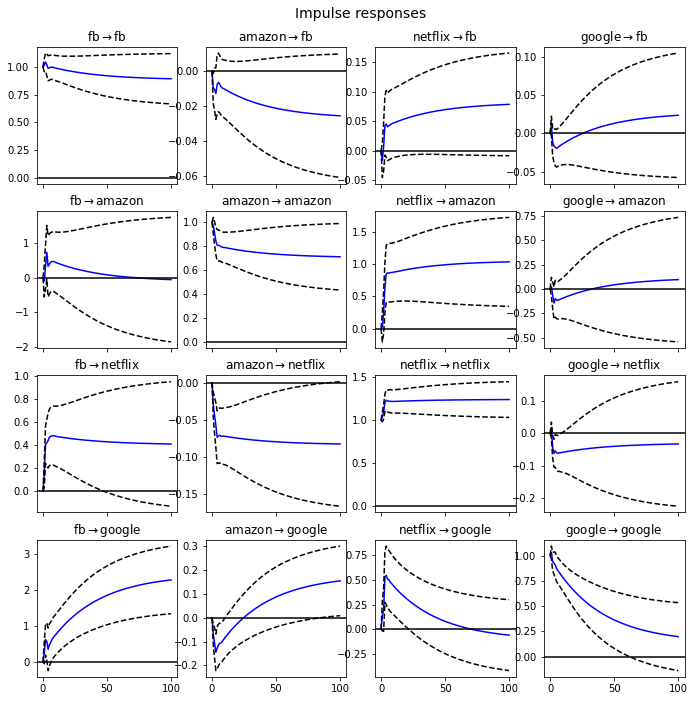

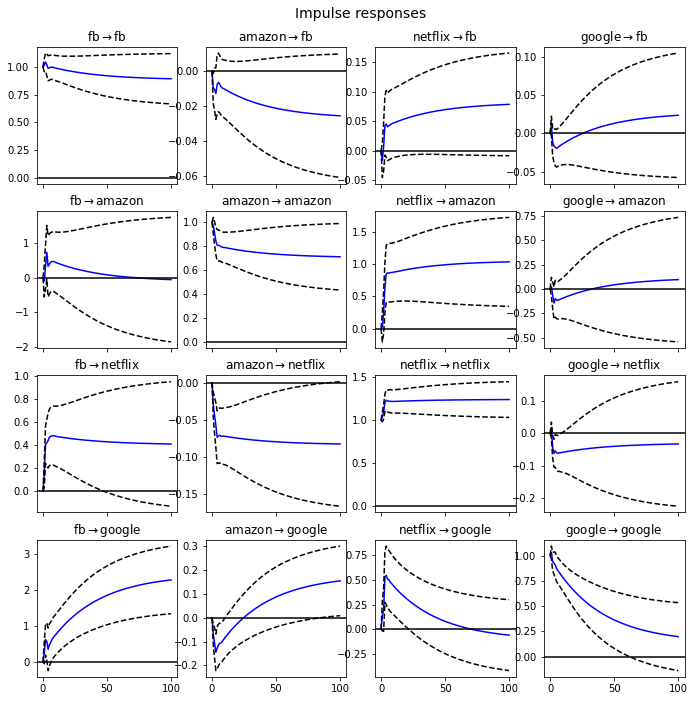

In [13]:
# stores and prints the impulse response functions
irf = fang_vecm_fit.irf(100)
irf.plot(orth = False)

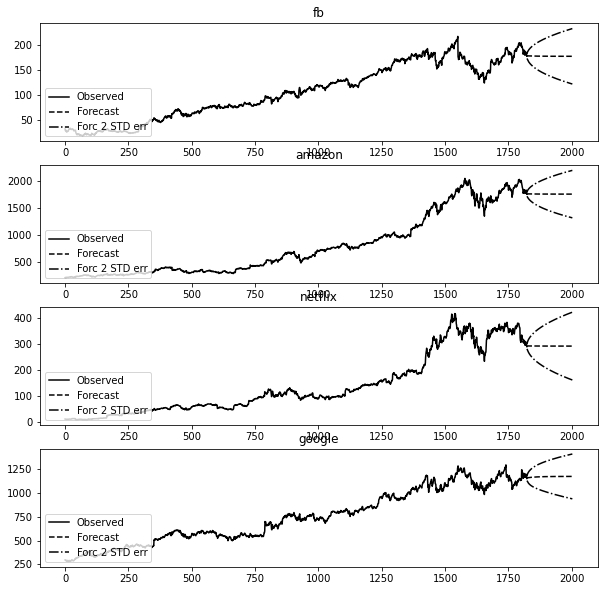

In [34]:
fang_vecm_fit.plot_forecast(180)

In [44]:

#from statsmodels.tsa.stattools import acf
train = fang.iloc[:len(fang)-50]
test = fang.iloc[len(fang)-50:]

# Build Model 
model2 = (train['fb'], order=(3, 1, 2))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(50, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)
forecast=pd.DataFrame(fc_series)


mape = np.mean(np.abs((test['fb'] - forecast)/test['fb']))*100

#Plot
#pd.plotting.register_matplotlib_converters()
#plt.figure(figsize=(12,5), dpi=100)
#plt.plot(train['fb'], label='training')
#plt.plot(test['fb'], label='actual')

  
print(forecast)
#plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
 #                color='k', alpha=.15)
#plt.title('Forecast vs Actuals')
#plt.legend(loc='upper left', fontsize=8)
#plt.show()

Date
2019-06-14    177.531298
2019-06-17    177.595456
2019-06-18    177.662023
2019-06-19    177.730619
2019-06-20    177.800924
2019-06-21    177.872668
2019-06-24    177.945624
2019-06-25    178.019601
2019-06-26    178.094438
2019-06-27    178.169999
2019-06-28    178.246170
2019-07-01    178.322854
2019-07-02    178.399972
2019-07-03    178.477453
2019-07-05    178.555242
2019-07-08    178.633289
2019-07-09    178.711553
2019-07-10    178.790001
2019-07-11    178.868604
2019-07-12    178.947336
2019-07-15    179.026178
2019-07-16    179.105112
2019-07-17    179.184124
2019-07-18    179.263202
2019-07-19    179.342334
2019-07-22    179.421513
2019-07-23    179.500731
2019-07-24    179.579982
2019-07-25    179.659260
2019-07-26    179.738562
2019-07-29    179.817884
2019-07-30    179.897222
2019-07-31    179.976574
2019-08-01    180.055938
2019-08-02    180.135312
2019-08-05    180.214694
2019-08-06    180.294084
2019-08-07    180.373479
2019-08-08    180.452879
2019-08-09    180.53

NameError: name 'train' is not defined

In [37]:
fang.iloc[1778]

fb          181.330002
amazon     1869.670044
netflix     339.730011
google     1086.300049
Name: 2019-06-14, dtype: float64

1778
1827
2017-03-31    1091.447198
2017-04-01    1091.473009
2017-04-02    1091.378064
2017-04-03    1091.374240
2017-04-04    1091.311672
2017-04-05    1091.307878
2017-04-06    1091.267222
2017-04-07    1091.263938
2017-04-08    1091.237505
2017-04-09    1091.234839
2017-04-10    1091.217643
2017-04-11    1091.215565
2017-04-12    1091.204371
2017-04-13    1091.202796
2017-04-14    1091.195505
2017-04-15    1091.194336
2017-04-16    1091.189584
2017-04-17    1091.188729
2017-04-18    1091.185630
2017-04-19    1091.185013
2017-04-20    1091.182990
2017-04-21    1091.182549
2017-04-22    1091.181229
2017-04-23    1091.180916
2017-04-24    1091.180053
2017-04-25    1091.179833
2017-04-26    1091.179269
2017-04-27    1091.179114
2017-04-28    1091.178745
2017-04-29    1091.178638
2017-04-30    1091.178396
2017-05-01    1091.178322
2017-05-02    1091.178164
2017-05-03    1091.178112
2017-05-04    1091.178009
2017-05-05    1091.177973
2017-05-06    1091.177905
2017-05-07    1091.177881
20

In [98]:
model2 = VECM(endog, k_ar_diff = 4, coint_rank = 1, deterministic = 'ci')
model_fit1 = model2.fit(disp=0)
#print(model_fit1.summary())

model_fit1.plot_predict(dynamic=False)
plt.show()

NameError: name 'endog' is not defined

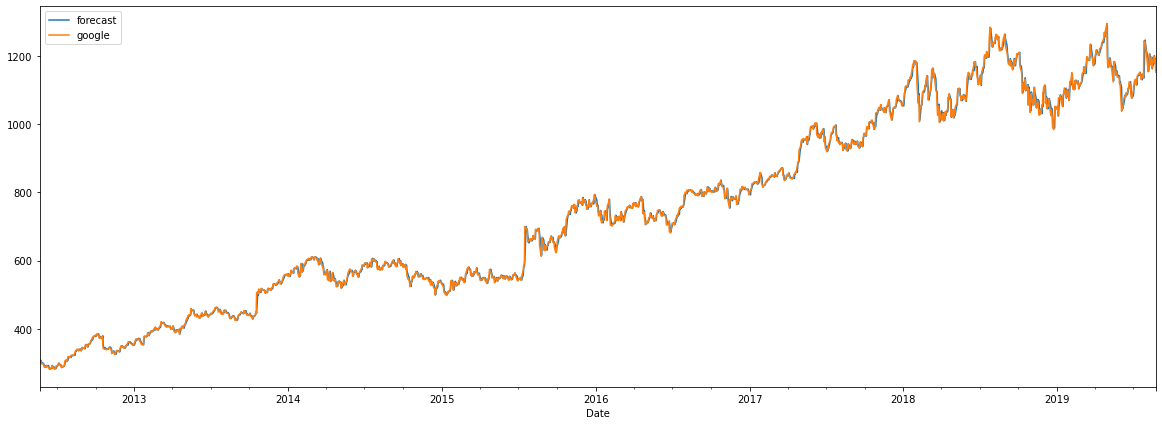

In [49]:
model_fit.plot_predict(dynamic=False)
plt.show()